In [174]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [175]:
#reading train and test datasets
tr=pd.read_csv('train.csv')
ts=pd.read_csv('test.csv')


In [176]:
#returns the label of each column
tr.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [177]:
#returning top 5 rows of train dataset
tr.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [178]:
#returning top 5 rows of test dataset
ts.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,32023,Male,4.0,0,0,No,children,Urban,79.16,20.2,Unknown
1,33064,Male,52.0,0,1,Yes,Private,Urban,87.00,30.9,never smoked
2,60896,Male,68.0,0,1,Yes,Private,Rural,145.25,31.5,never smoked
3,2109,Female,8.0,0,0,No,children,Urban,125.14,29.7,Unknown
4,27705,Female,82.0,0,1,Yes,Self-employed,Rural,88.60,32.5,Unknown


In [179]:
#print number of elements in each dimension
print(tr.shape)
print(ts.shape)

(4086, 12)
(1026, 11)


In [180]:
#finding number of null vales in train dataset
tr.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  177
smoking_status         0
stroke                 0
dtype: int64

In [181]:
#finding number of null vales in test dataset
ts.isnull().sum()

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  24
smoking_status        0
dtype: int64

In [182]:
#calculating percentage of null values
percent_missing=tr.isnull().sum()*100/len(tr)
percent_missing

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  4.331865
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [183]:
#dropping all the null values from train and test dataset
train=tr.dropna(axis=0,how='any')
test=ts.dropna(axis=0,how='any')

In [184]:
print(train.shape)

(3909, 12)


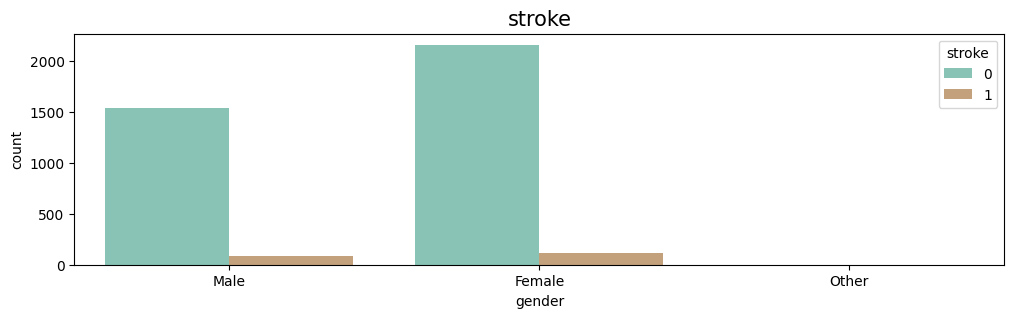

In [185]:
#data visualisation for stroke vs gender 
fig, ax = plt.subplots(figsize=(12, 3))
sns.countplot(x=train['gender'],hue=train["stroke"],palette= ["#7fcdbb", "#D0A171"])
plt.title("stroke",fontsize=15)
plt.show()

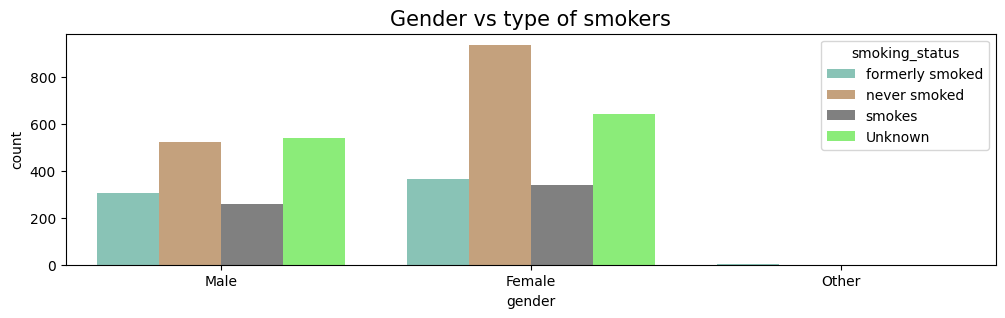

In [186]:
#data visualisation for gender vs types of smokers
fig, ax = plt.subplots(figsize=(12, 3))
sns.countplot(x=train['gender'],hue=train["smoking_status"],palette= ["#7fcdbb","#D0A171","#808080","#7EFF66"])
plt.title("Gender vs type of smokers",fontsize=15)
plt.show()


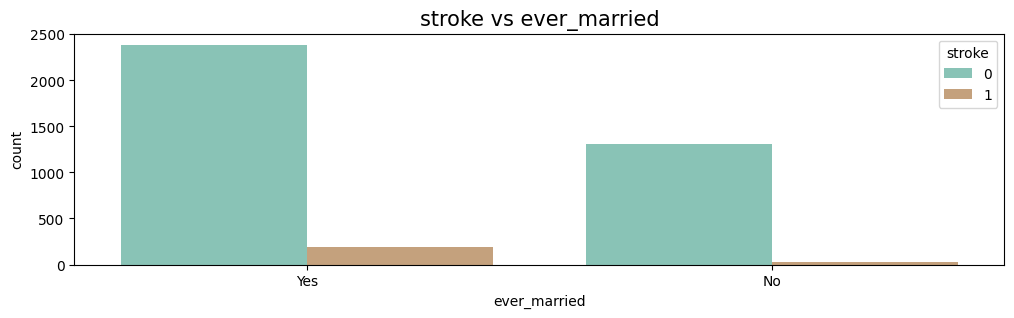

In [187]:
#data visualisation for stroke vs ever married?
fig, ax = plt.subplots(figsize=(12, 3))
sns.countplot(x=train['ever_married'],hue=train["stroke"],palette= ["#7fcdbb", "#D0A171"])
plt.title("stroke vs ever_married",fontsize=15)
plt.show()

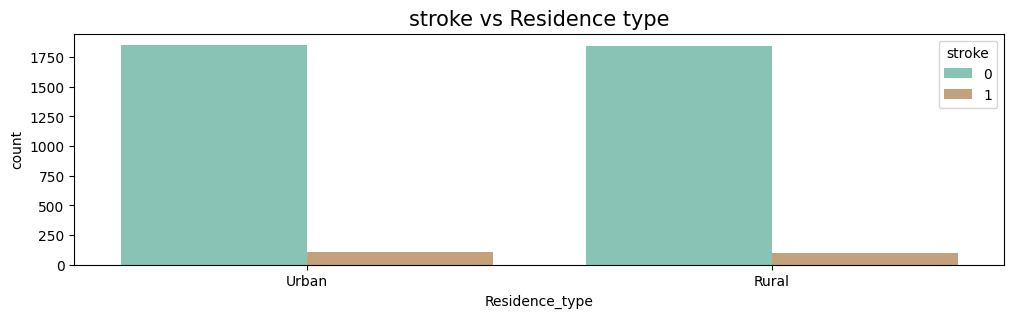

In [188]:
#data visualisation for stroke vs Residence type
fig, ax = plt.subplots(figsize=(12, 3))
sns.countplot(x=train['Residence_type'],hue=train["stroke"],palette= ["#7fcdbb", "#D0A171"])
plt.title("stroke vs Residence type",fontsize=15)
plt.show()

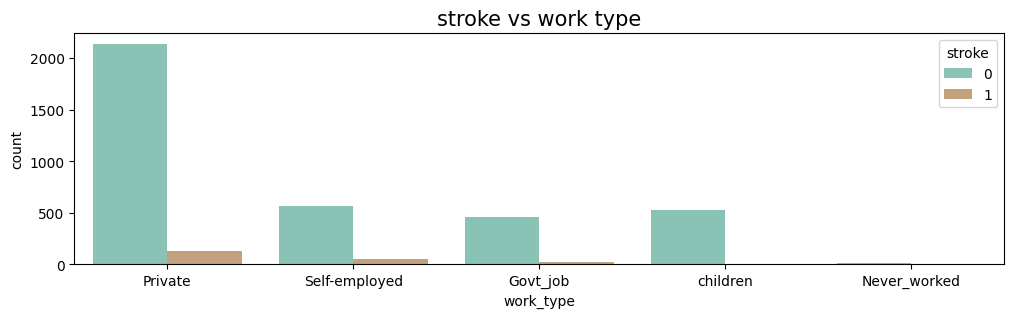

In [189]:
#data visualisation for stroke vs work type
fig, ax = plt.subplots(figsize=(12, 3))
sns.countplot(x=train['work_type'],hue=train["stroke"],palette= ["#7fcdbb", "#D0A171"])
plt.title("stroke vs work type",fontsize=15)
plt.show()

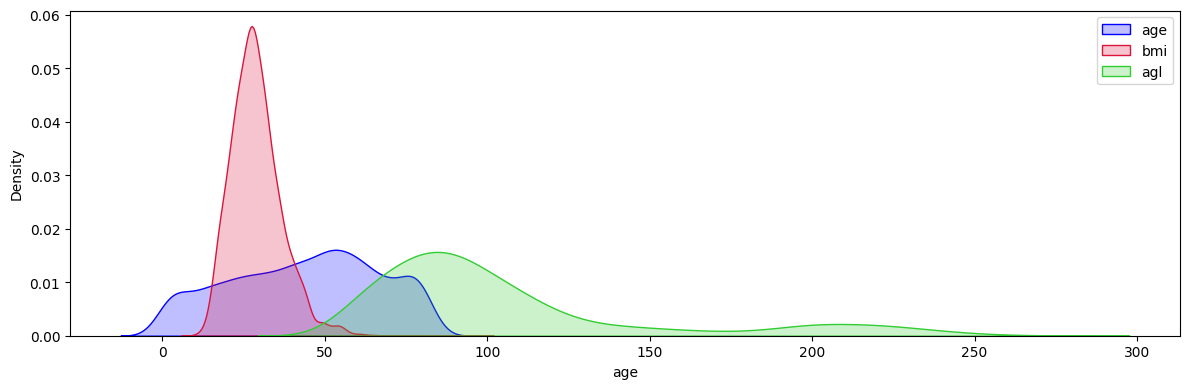

In [190]:
#data visualisation for age,bmi,avg glucose level
fig, ax = plt.subplots(figsize=(12, 4))
sns.kdeplot(data=tr.age, label='age',color='blue', fill=True, ax=ax)
sns.kdeplot(data=tr.bmi,color='crimson', label='bmi', fill=True, ax=ax)
sns.kdeplot(data=tr.avg_glucose_level,color='limegreen', label='agl', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

In [191]:
str_train=train.select_dtypes(include=['object'])
str_test=test.select_dtypes(include=['object'])

In [192]:
int_train=train.select_dtypes(include=['int','float'])
int_test=test.select_dtypes(include=['int','float'])

In [193]:
#converting categorical values to numerical values
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
train_data=str_train.apply(label.fit_transform)
train_data=train_data.join(int_train)
train_data.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,1,2,1,1,9046,67.0,0,1,228.69,36.6,1
2,1,1,2,0,2,31112,80.0,0,1,105.92,32.5,1
3,0,1,2,1,3,60182,49.0,0,0,171.23,34.4,1
4,0,1,3,0,2,1665,79.0,1,0,174.12,24.0,1
5,1,1,2,1,1,56669,81.0,0,0,186.21,29.0,1


In [194]:
#converting categorical values to numerical values
test_data=str_test.apply(label.fit_transform)
test_data=test_data.join(int_test)
test_data.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,0,4,1,0,32023,4.0,0,0,79.16,20.2
1,1,1,2,1,2,33064,52.0,0,1,87.00,30.9
2,1,1,2,0,2,60896,68.0,0,1,145.25,31.5
3,0,0,4,1,0,2109,8.0,0,0,125.14,29.7
4,0,1,3,0,0,27705,82.0,0,1,88.60,32.5


In [195]:
xtrain=train_data.drop(["stroke"],axis=1)
xtrain.shape

(3909, 11)

In [196]:
ytrain=train_data['stroke']
ytrain.shape

(3909,)

In [197]:
#splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xtrain,ytrain,test_size=0.5)

In [198]:
x_train.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
3961,1,1,2,1,2,4655,49.0,0,0,79.51,37.8
701,1,1,2,1,2,13997,38.0,0,0,88.97,30.2
833,1,0,4,0,0,54643,5.0,0,0,160.83,17.8
4059,1,1,2,1,3,38014,24.0,0,0,83.10,21.9
3990,0,0,2,0,1,70661,28.0,0,0,134.12,28.8


In [199]:
x_test.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
1256,1,1,3,0,2,62284,63.0,0,0,78.43,18.8
732,0,1,2,1,1,31308,49.0,0,0,114.50,35.9
2059,1,1,2,0,1,36750,64.0,1,0,228.42,42.3
2929,1,0,4,1,0,6132,4.0,0,0,103.34,18.8
509,0,1,2,0,2,29496,39.0,0,0,84.79,35.7


In [200]:
#Naive bayes classifeir model 
from sklearn.naive_bayes import GaussianNB

In [201]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [204]:
#Accuracy 
test_score=model.score(x_test,y_test)
print("Naive Bayes:",test_score)

Naive Bayes: 0.9130434782608695


In [202]:
#predicting stroke for test dataset
predict=model.predict(x_test)
for x in predict:    
    print( x)

0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0


Naive Bayes: 0.9130434782608695
